<a href="https://colab.research.google.com/github/Vicjosh07/customer_satisfaction_project/blob/main/customer_satisfaction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# Create dataframes
print("Creating dataframes...")
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("Completed..")
# col_to_drop = df_train.columns[:2]
df_train.drop(columns=df_train.columns[:2], inplace=True)
df_test.drop(columns=df_test.columns[:2], inplace=True)

Creating dataframes...
Completed..


In [4]:
df_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
df = pd.concat([df_train, df_test])
df.shape

(129880, 23)

In [6]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [7]:
object_col = [col for col in df.columns if df[col].dtype == 'object' ]
object_col

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [26]:
encode = LabelEncoder()
# Apply LabelEncoder to each column
for col in object_col:
    df[col] = encode.fit_transform(df[col])

In [27]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [10]:
print("Number of Uniques in the encoded data columns:")
for i in object_col:
    num_uni = df[i].nunique()
    print(f"{i}: {num_uni}")

Number of Uniques in the encoded data columns:
Gender: 2
Customer Type: 2
Type of Travel: 2
Class: 3
satisfaction: 2


In [11]:
# Identify the second-to-last column
second_to_last_col = df.columns[-2]

# Find rows where the second-to-last column is null
null_items = df.loc[df[second_to_last_col].isnull()]

# Display the first five samples
first_five_null = null_items.head(5)
print(first_five_null)


      Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
213        0              0   38               0      1              109   
1124       1              0   53               1      1             1012   
1529       1              0   39               0      0              733   
2004       0              1   26               0      0             1035   
2108       0              0   24               1      1              417   

      Inflight wifi service  Departure/Arrival time convenient  \
213                       5                                  3   
1124                      3                                  2   
1529                      2                                  5   
2004                      3                                  3   
2108                      2                                  1   

      Ease of Online booking  Gate location  ...  Inflight entertainment  \
213                        3              3  ...                      

In [12]:
# since the 393 rows in the Arrival Delay in Minutes is negligible i'll just drop it..

In [13]:
df.dropna(inplace =True)

In [14]:
df.shape

(129487, 23)

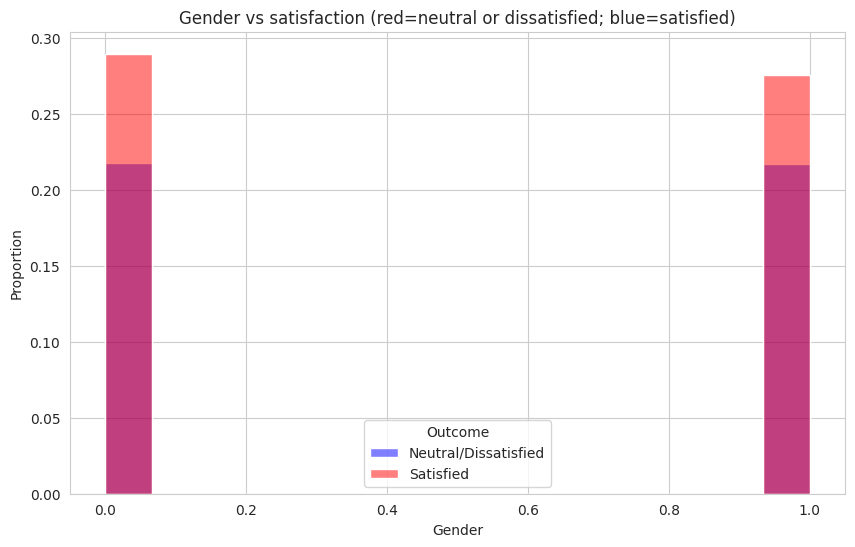

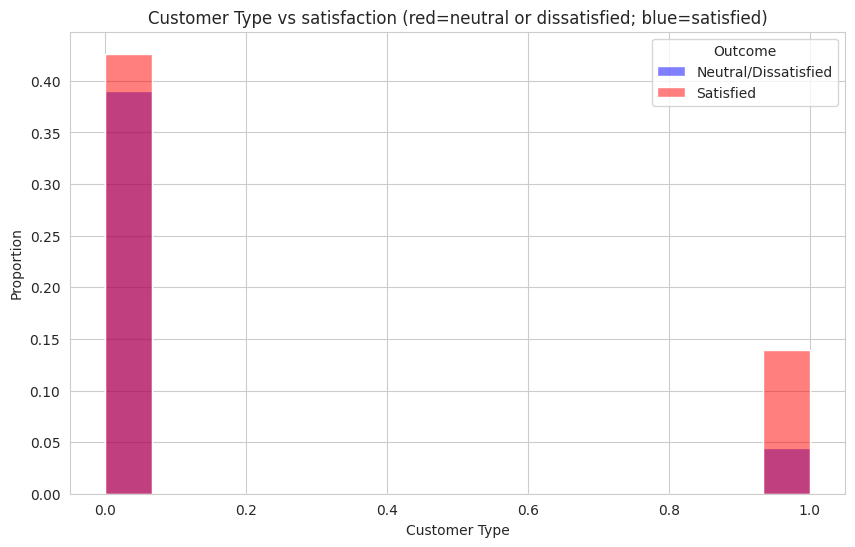

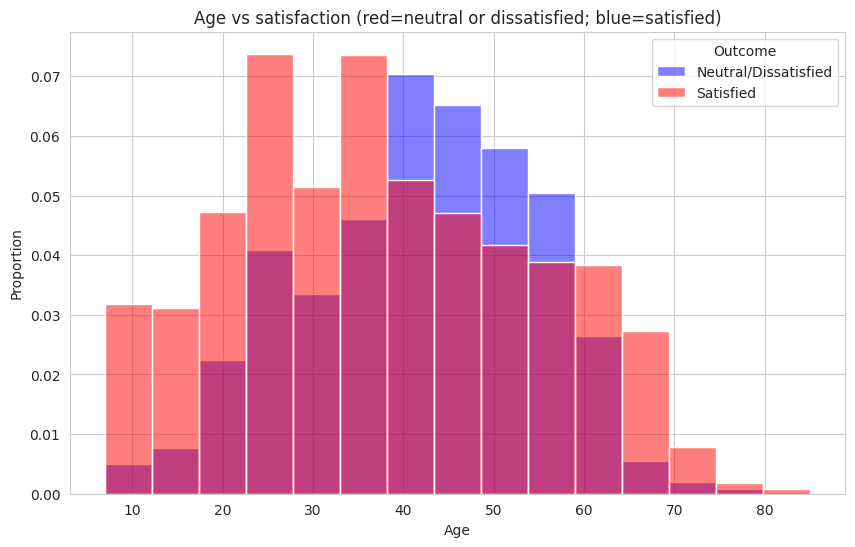

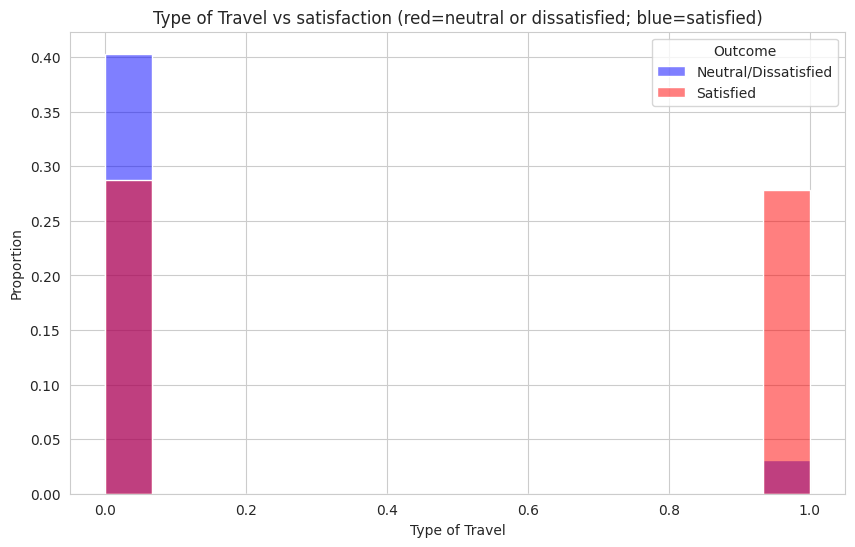

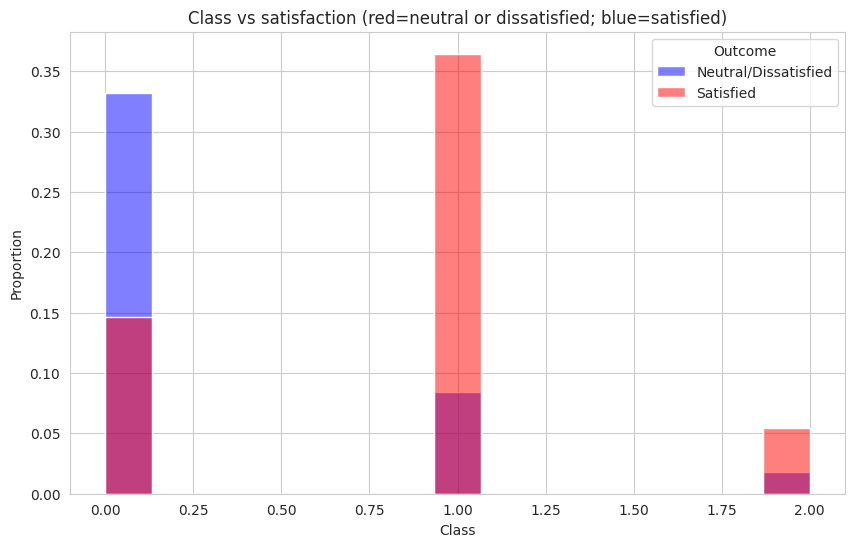

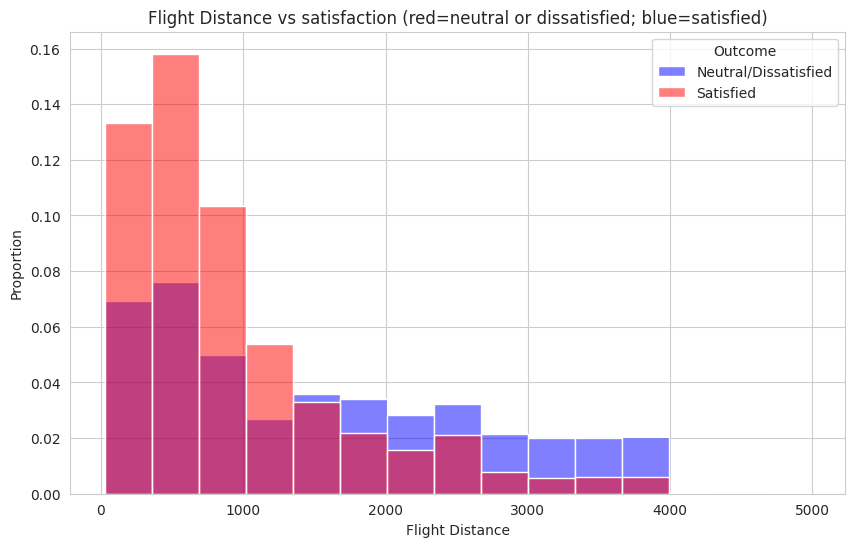

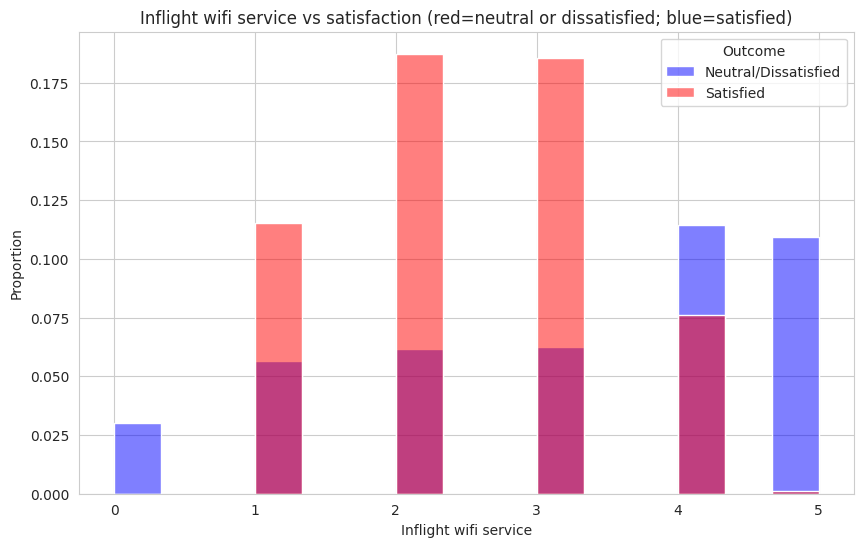

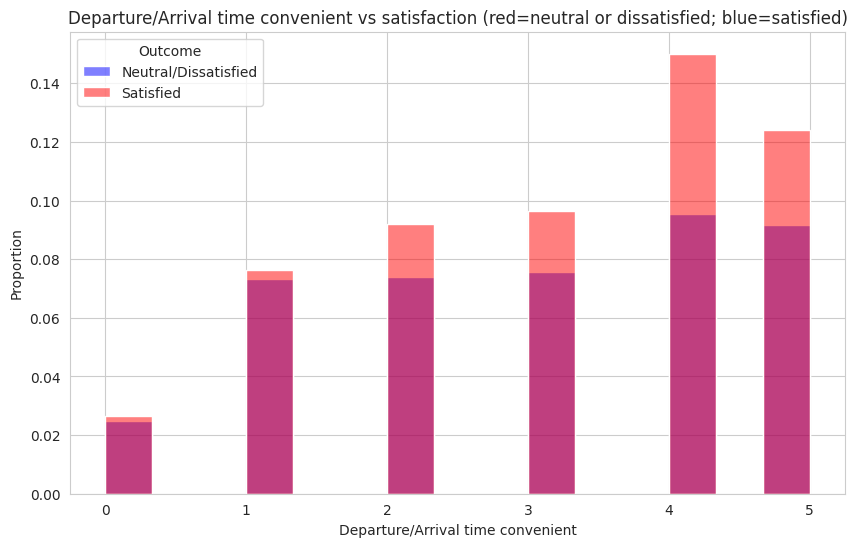

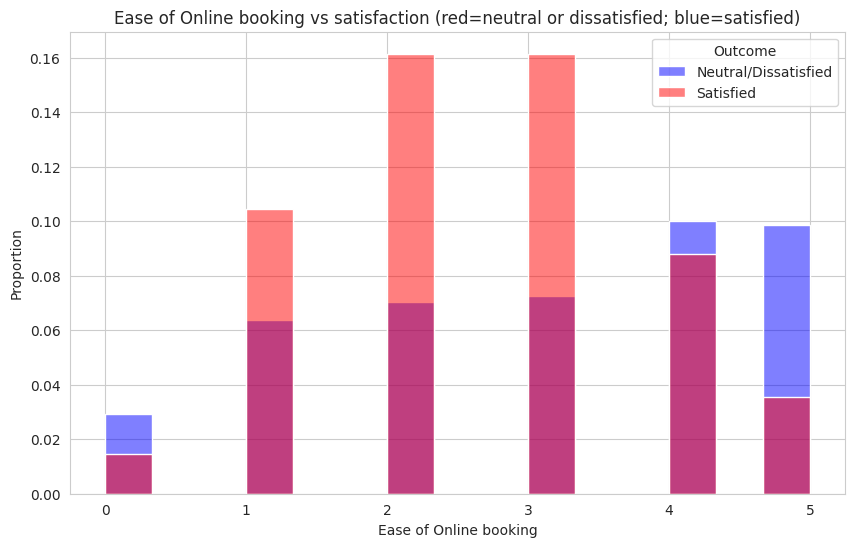

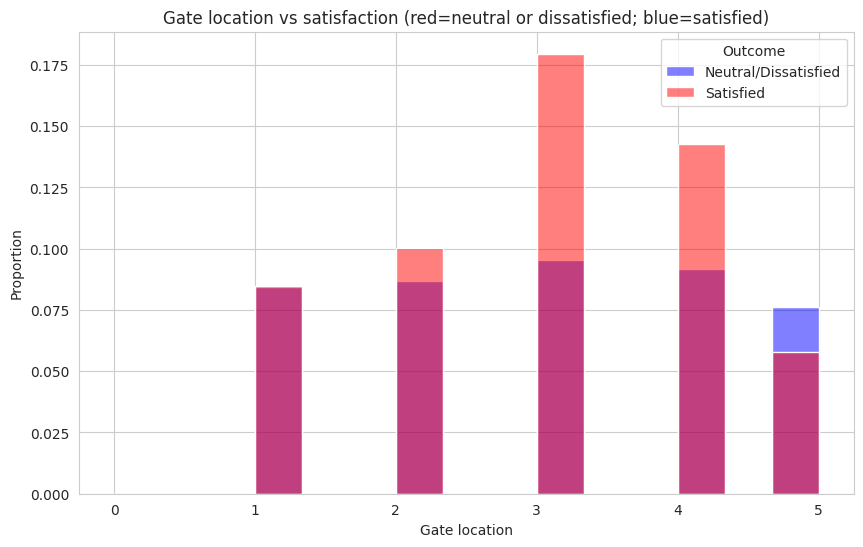

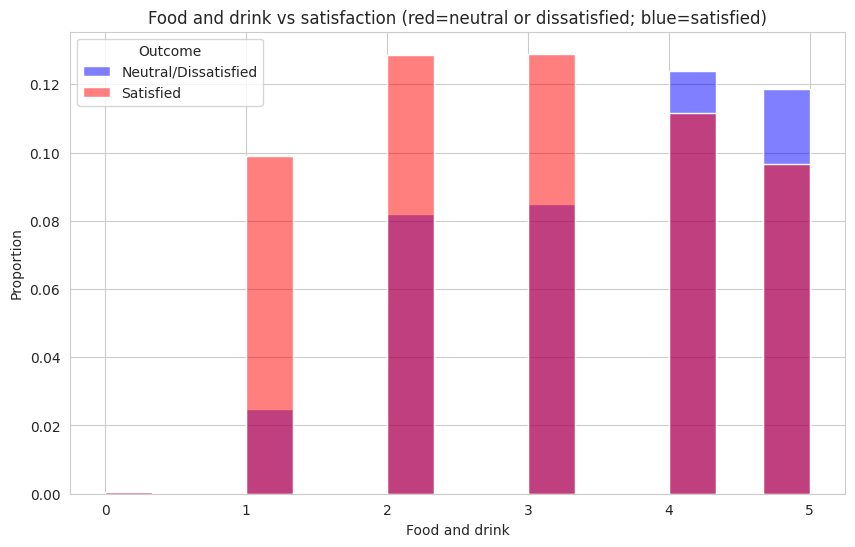

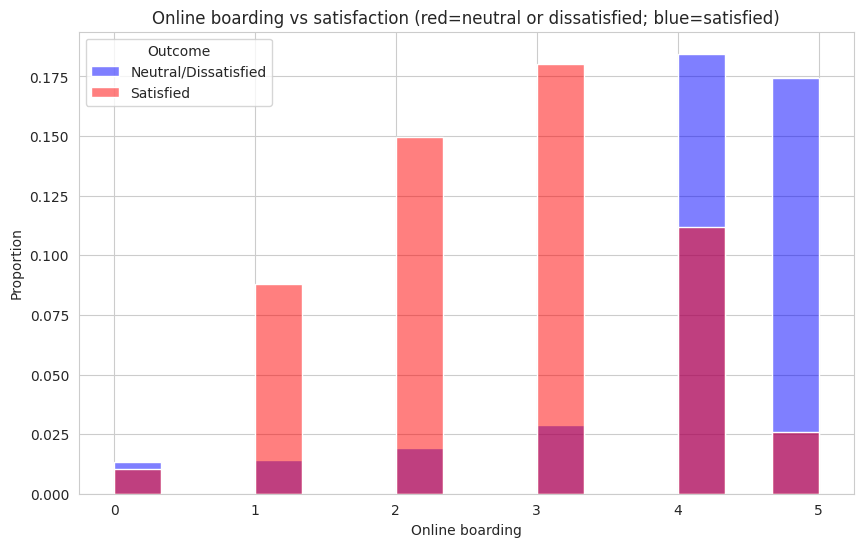

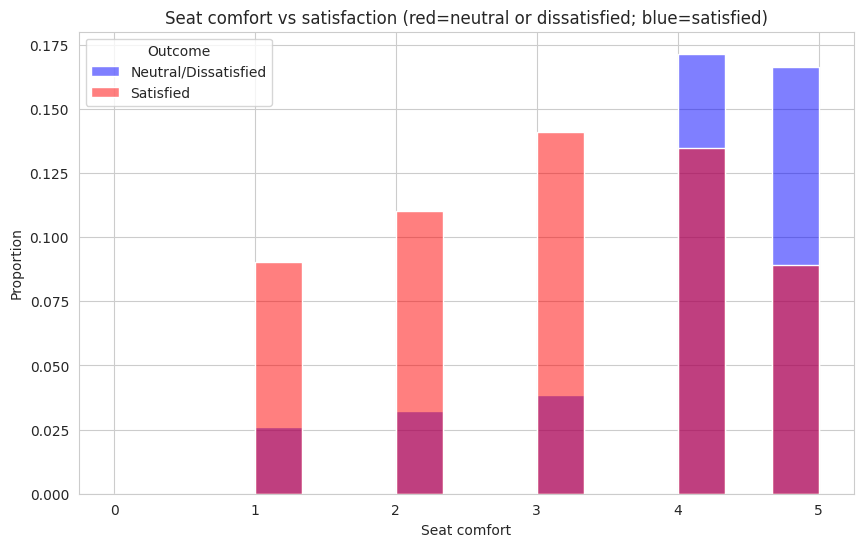

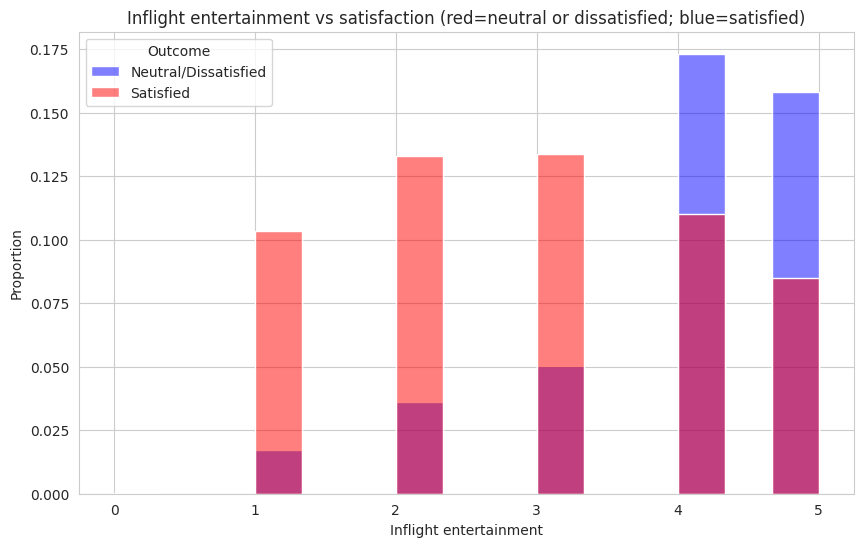

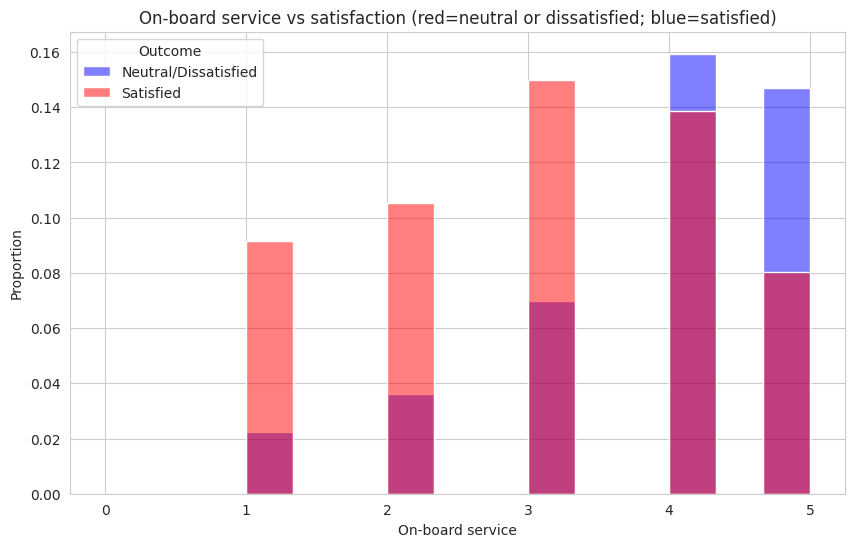

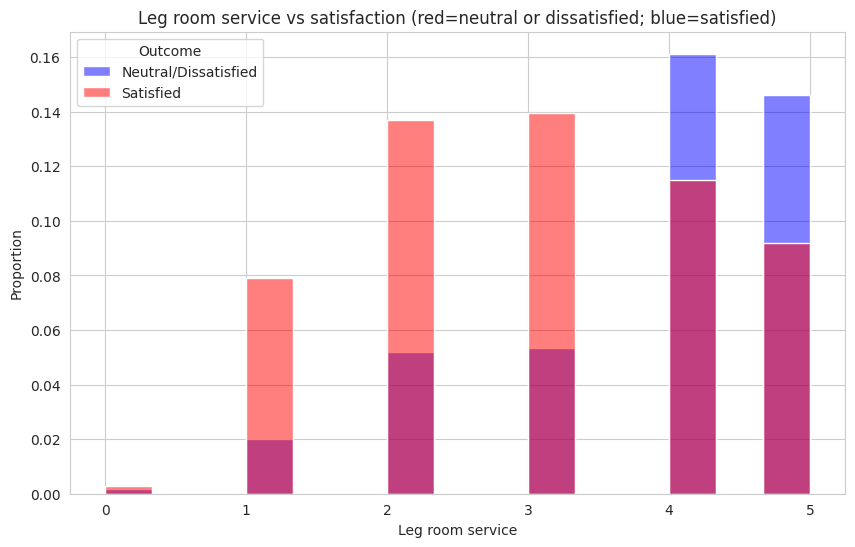

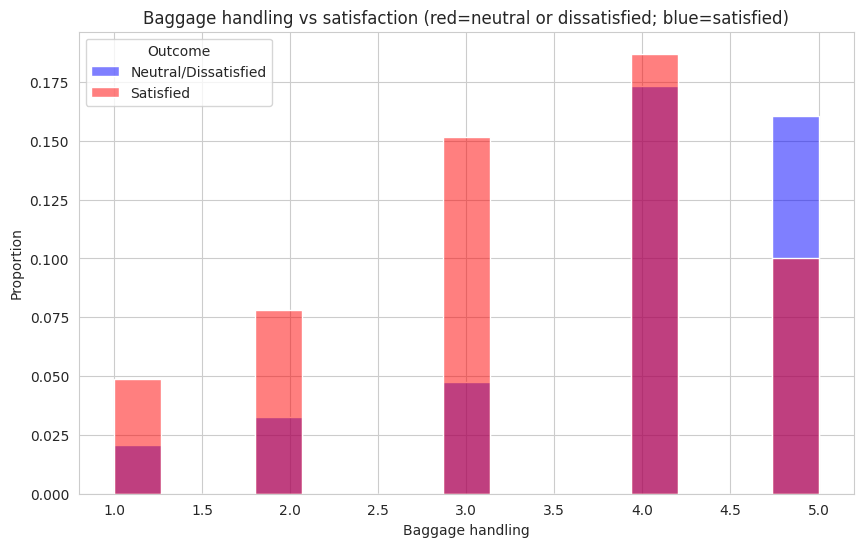

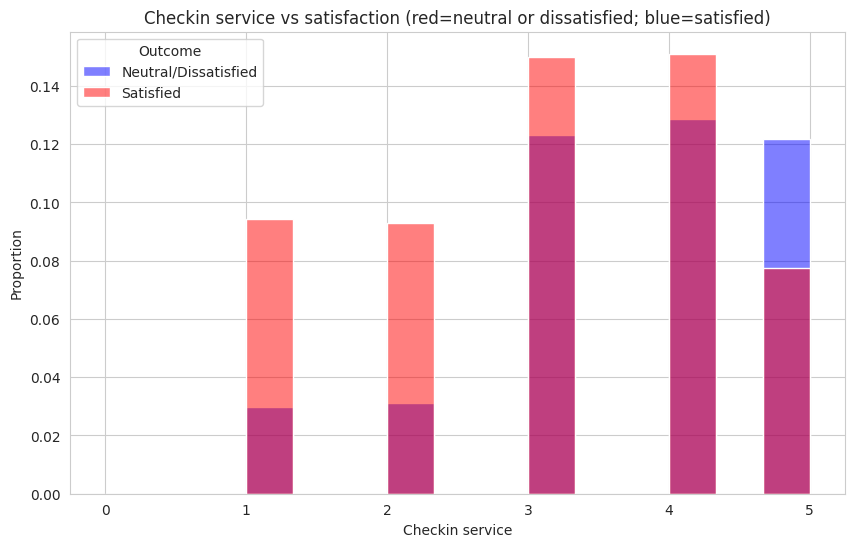

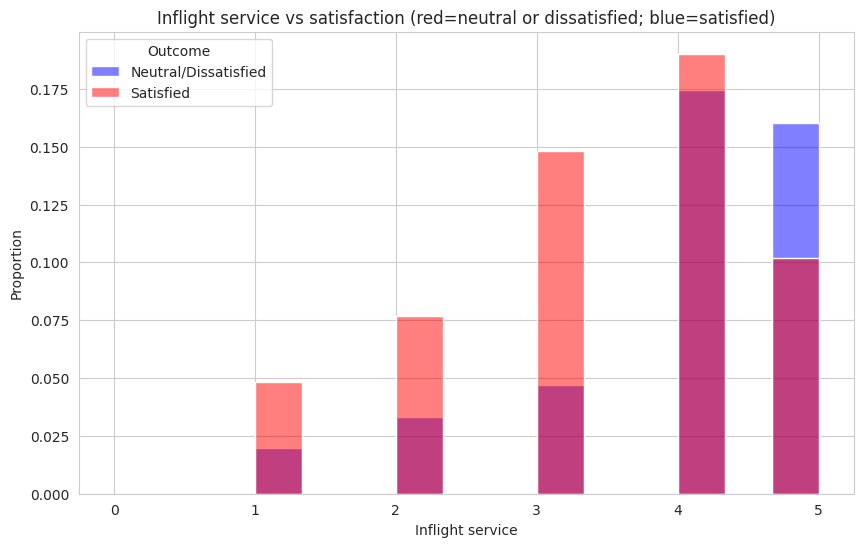

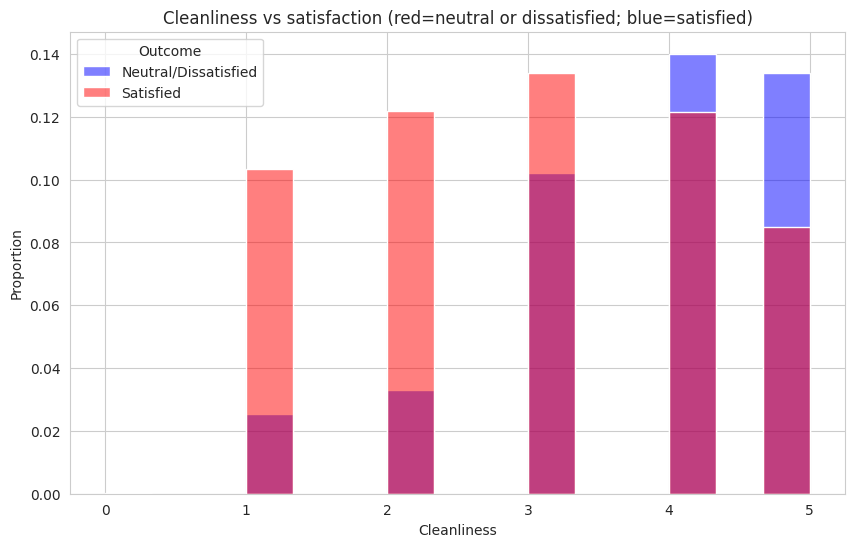

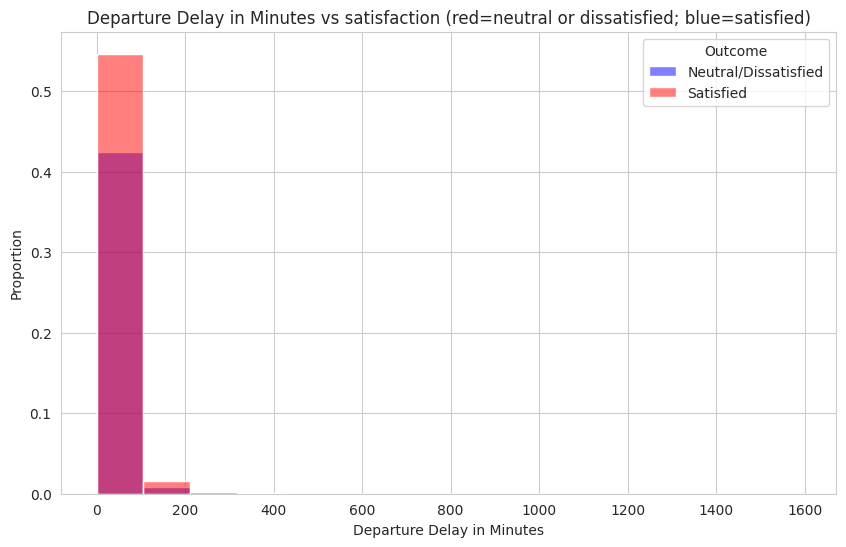

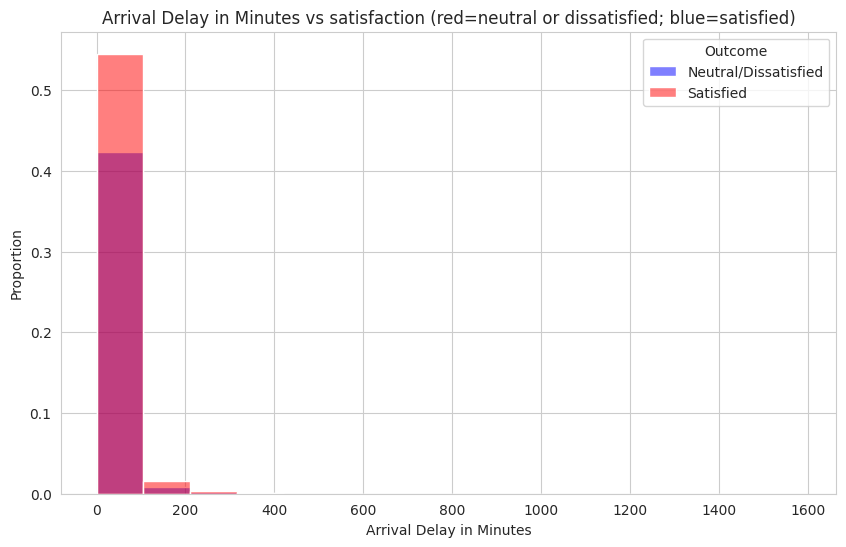

In [15]:
# Define the function to plot histograms (outside the loop)
def plotHistogram(data, feature, label, title):
    sns.set_style("whitegrid")

    # Define a palette mapping
    custom_palette = {0: 'red', 1: 'blue'}

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data,
        x=feature,
        hue=label,
        kde=False,
        bins=15,
        palette=custom_palette,
        alpha=0.5,
        stat="probability"  # Display as proportions
    )
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(labels=["Neutral/Dissatisfied", "Satisfied"], title="Outcome")
    plt.show()

# Loop through each feature except the label (Outcome)
for feature in df.columns[:-1]:  # Exclude the last column (assumed label)
    plotHistogram(
        data=df,
        feature=feature,
        label=df.columns[-1],  # The label column (assumed to be the last column)
        title=f"{feature} vs {df.columns[-1]} (red=neutral or dissatisfied; blue=satisfied)"
    )


In [16]:
# Automatically identify columns with few unique values as categorical
for col in df.columns:
    if df[col].nunique() < 10:  # Threshold for "few unique values"
        df[col] = df[col].astype('category')


In [17]:
x = df[df.columns[:-1]]  # All columns except the last one
y = df[df.columns[-1]]   # The last column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Training Decision Tree...
Decision Tree Model Performance:
Accuracy: 0.9474476793574793
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14668
           1       0.94      0.94      0.94     11230

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Confusion Matrix:
 [[13979   689]
 [  672 10558]]


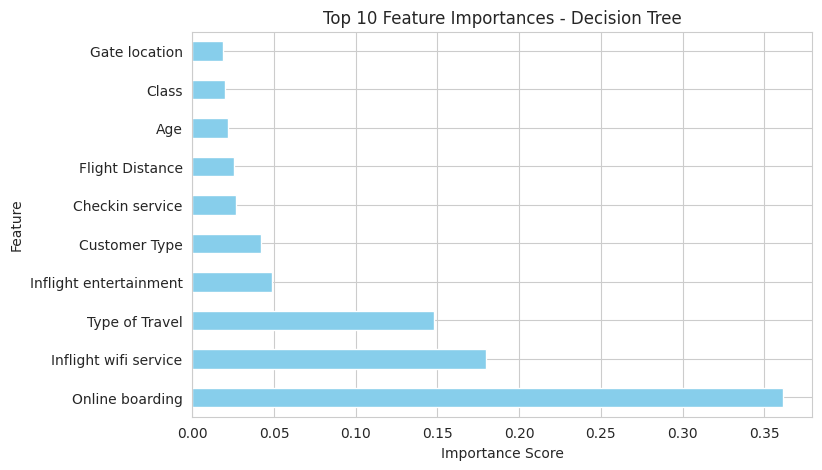

Training SVM...
SVM Model Performance:
Accuracy: 0.9529307282415631
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     14668
           1       0.95      0.94      0.95     11230

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Confusion Matrix:
 [[14098   570]
 [  649 10581]]
SVM does not support feature importances directly.
Training Logistic Regression...
Logistic Regression Model Performance:
Accuracy: 0.8755116225191134
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14668
           1       0.87      0.84      0.85     11230

    accuracy                           0.88     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.88      0.88      0.88     25898

Confusion Matrix:
 [[13266  1

<Figure size 800x500 with 0 Axes>

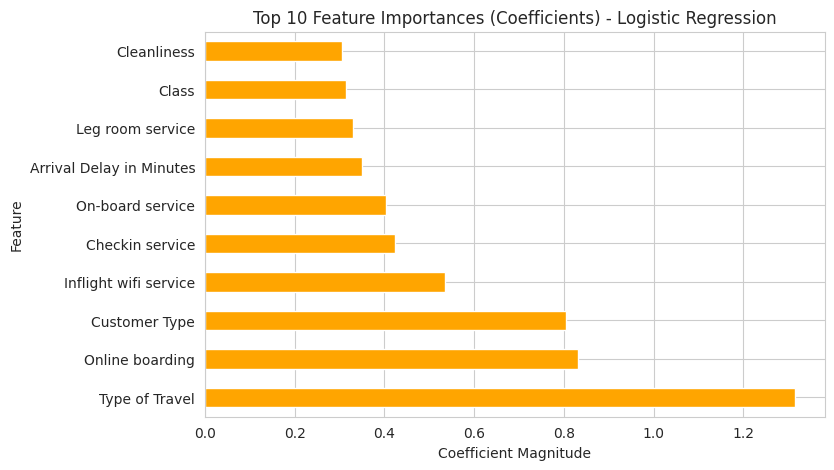

Training Random Forest Classifier...
Random Forest Classifier Model Performance:
Accuracy: 0.9621592400957603
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14668
           1       0.97      0.94      0.96     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

Confusion Matrix:
 [[14354   314]
 [  666 10564]]


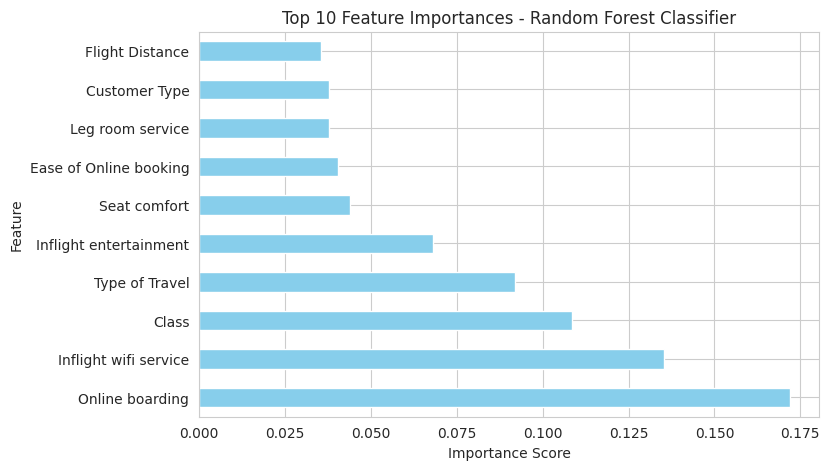

Training K-Nearest Neighbors...
K-Nearest Neighbors Model Performance:
Accuracy: 0.9296856900146729
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     14668
           1       0.95      0.88      0.92     11230

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.93     25898
weighted avg       0.93      0.93      0.93     25898

Confusion Matrix:
 [[14162   506]
 [ 1315  9915]]
K-Nearest Neighbors does not support feature importances directly.
Training Gradient Boosting...
Gradient Boosting Model Performance:
Accuracy: 0.9402656575797359
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14668
           1       0.94      0.92      0.93     11230

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0

<Figure size 800x500 with 0 Axes>

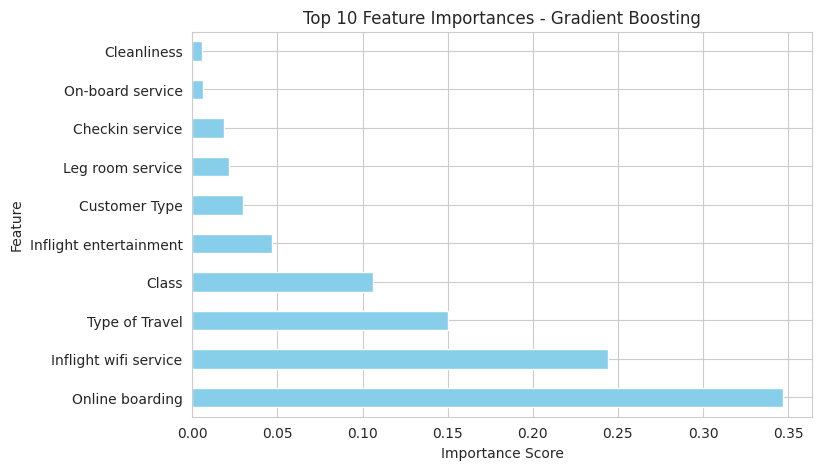

Training Naive Bayes...
Naive Bayes Model Performance:
Accuracy: 0.8639277164259789
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     14668
           1       0.86      0.82      0.84     11230

    accuracy                           0.86     25898
   macro avg       0.86      0.86      0.86     25898
weighted avg       0.86      0.86      0.86     25898

Confusion Matrix:
 [[13162  1506]
 [ 2018  9212]]
Naive Bayes does not support feature importances directly.
Training XGB...
XGB Model Performance:
Accuracy: 0.8887558884855974
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     14668
           1       0.89      0.85      0.87     11230

    accuracy                           0.89     25898
   macro avg       0.89      0.88      0.89     25898
weighted avg       0.89      0.89      0.89     25898

Confusion Matrix:
 [[13467  1201]
 [ 

<Figure size 800x500 with 0 Axes>

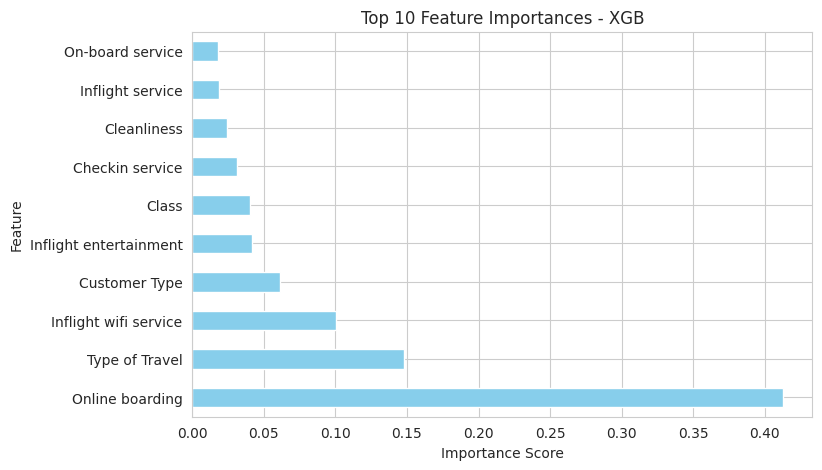

Training CatBoost...
0:	learn: 0.5635032	total: 27.3ms	remaining: 13.6s
1:	learn: 0.4706878	total: 53.6ms	remaining: 13.3s
2:	learn: 0.3753386	total: 81.1ms	remaining: 13.4s
3:	learn: 0.3333885	total: 118ms	remaining: 14.6s
4:	learn: 0.3018997	total: 146ms	remaining: 14.4s
5:	learn: 0.2695481	total: 177ms	remaining: 14.6s
6:	learn: 0.2433126	total: 204ms	remaining: 14.4s
7:	learn: 0.2144874	total: 232ms	remaining: 14.3s
8:	learn: 0.2031018	total: 259ms	remaining: 14.2s
9:	learn: 0.1959130	total: 286ms	remaining: 14s
10:	learn: 0.1889344	total: 313ms	remaining: 13.9s
11:	learn: 0.1794135	total: 345ms	remaining: 14s
12:	learn: 0.1750259	total: 374ms	remaining: 14s
13:	learn: 0.1712051	total: 402ms	remaining: 14s
14:	learn: 0.1676638	total: 429ms	remaining: 13.9s
15:	learn: 0.1607657	total: 456ms	remaining: 13.8s
16:	learn: 0.1580423	total: 483ms	remaining: 13.7s
17:	learn: 0.1545142	total: 527ms	remaining: 14.1s
18:	learn: 0.1521833	total: 563ms	remaining: 14.2s
19:	learn: 0.1496937	tota

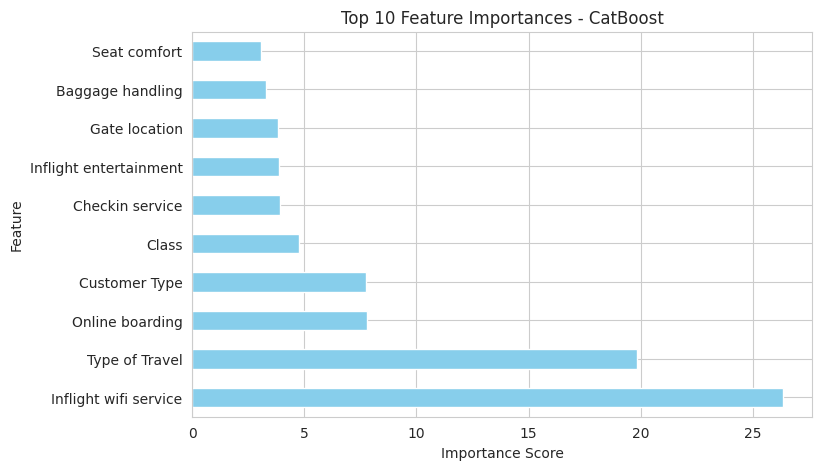

In [23]:
# Models to test with hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "SVM": SVC(random_state=1, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(max_depth=25, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Naive Bayes": GaussianNB(),
    "XGB": xgb.XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, random_state=42, learning_rate=0.1),
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Model evaluation
    print(f"{model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Visualize the top 10 feature importances
    plt.figure(figsize=(8, 5))  # Set figure size

    # Ensure x_train is a DataFrame before extracting feature names
    if isinstance(x_train, np.ndarray):
        x_train_df = pd.DataFrame(x_train, columns=x.columns)  # Convert back to DataFrame
    else:
        x_train_df = x_train  # Keep it as is if already a DataFrame

    # Extract actual feature names
    feature_names = x_train_df.columns

    if hasattr(model, "feature_importances_"):
        feature_importances = pd.Series(model.feature_importances_, index=feature_names)
        feature_importances.nlargest(10).plot(kind='barh', color="skyblue")
        plt.title(f'Top 10 Feature Importances - {model_name}')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.show()

    elif hasattr(model, "coef_"):  # For models like Logistic Regression
        coefficients = pd.Series(abs(model.coef_[0]), index=feature_names)
        coefficients.nlargest(10).plot(kind='barh', color="orange")
        plt.title(f'Top 10 Feature Importances (Coefficients) - {model_name}')
        plt.xlabel('Coefficient Magnitude')
        plt.ylabel('Feature')
        plt.show()

    else:
        print(f"{model_name} does not support feature importances directly.")
